In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from sklearn.metrics import classification_report

In [2]:
# Kaggle dataset directories
train_data_dir = "LOW_SIZE_DATA/test"
test_data_dir = "LOW_SIZE_DATA/test"

img_size = 48
categories = ['REAL', 'FAKE']

def load_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img))
                resized_array = cv.resize(img_array, (img_size, img_size))
                resized_array = resized_array / 255.0
                data.append([resized_array, class_num])
            except Exception as e:
                pass
    return data

In [3]:
# Load and preprocess the data
training_data = load_data(train_data_dir, categories, img_size)
testing_data = load_data(test_data_dir, categories, img_size)

random.shuffle(training_data)
random.shuffle(testing_data)

X_train = []
y_train = []
X_test = []
y_test = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [4]:
# Creating the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [6]:
# Training the model
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='AIGeneratedModel.h5', verbose = 2, save_best_only=True)

callbac = [checkpoint]

start = datetime.now()

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=callbac, verbose=2)

duration = datetime.now() - start
print("Time taken;", duration)


Epoch 1/15

Epoch 1: val_loss improved from inf to 0.57980, saving model to AIGeneratedModel.h5
625/625 - 59s - loss: 0.5403 - accuracy: 0.7216 - val_loss: 0.5798 - val_accuracy: 0.7150 - 59s/epoch - 95ms/step
Epoch 2/15


c:\Users\Rohith Sai\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.57980 to 0.40879, saving model to AIGeneratedModel.h5
625/625 - 63s - loss: 0.4518 - accuracy: 0.7902 - val_loss: 0.4088 - val_accuracy: 0.8200 - 63s/epoch - 101ms/step
Epoch 3/15

Epoch 3: val_loss improved from 0.40879 to 0.36844, saving model to AIGeneratedModel.h5
625/625 - 100s - loss: 0.4109 - accuracy: 0.8169 - val_loss: 0.3684 - val_accuracy: 0.8444 - 100s/epoch - 160ms/step
Epoch 4/15

Epoch 4: val_loss improved from 0.36844 to 0.32015, saving model to AIGeneratedModel.h5
625/625 - 49s - loss: 0.3698 - accuracy: 0.8386 - val_loss: 0.3201 - val_accuracy: 0.8751 - 49s/epoch - 79ms/step
Epoch 5/15

Epoch 5: val_loss improved from 0.32015 to 0.29128, saving model to AIGeneratedModel.h5
625/625 - 50s - loss: 0.3348 - accuracy: 0.8561 - val_loss: 0.2913 - val_accuracy: 0.8819 - 50s/epoch - 79ms/step
Epoch 6/15

Epoch 6: val_loss improved from 0.29128 to 0.25727, saving model to AIGeneratedModel.h5
625/625 - 47s - loss: 0.3070 - accuracy: 0.8682 - v

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Predictions
y_pred = model.predict(X_test)
y_predicted = (y_pred > 0.5).astype("int32").flatten()

# Classification report
print(classification_report(y_test, y_predicted))

625/625 [==============================] - 10s 15ms/step - loss: 0.1677 - accuracy: 0.9309
Test accuracy: 0.9309499859809875
625/625 [==============================] - 8s 13ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10000
           1       0.91      0.96      0.93     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



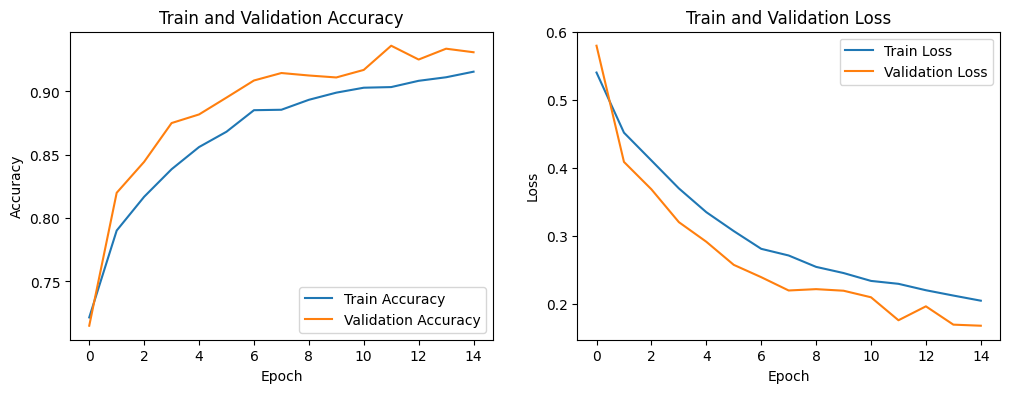

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()

In [12]:
import os
import cv2

training_set_path = "LOW_SIZE_DATA/test/REAL"  # Replace with the actual path to your training set

# Iterate over all files in the training set directory
for filename in os.listdir(training_set_path):
    image_path = os.path.join(training_set_path, filename)

    # Try to open the image using OpenCV
    try:
        image = cv2.imread(image_path)
        if image is None:
            # Image cannot be opened
            print(f"Deleting image: {filename}")
            os.remove(image_path)
    except Exception as e:
        # An error occurred while opening the image
        print(f"Error opening image {filename}: {str(e)}")